In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from _lib.preprocess import preprocess_missing as prep
from _lib.preprocess import get_instruction as info

In [2]:
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("_database/Input/train.csv", index_col = 0)

In [4]:
df = prep(df)

C:\Anaconda\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
df["LogSalePrice"] = np.log(df["SalePrice"])

In [6]:
y = df["SalePrice"]

Now we use 2 features that have highest correlation with log price

In [7]:
X = df[["GrLivArea", "GarageArea"]]

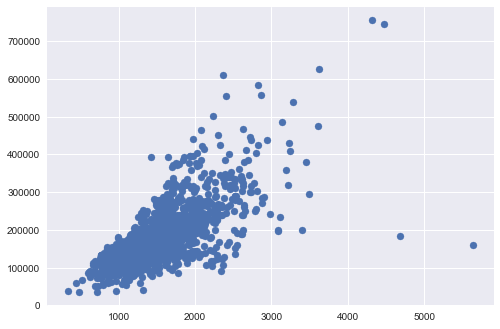

In [8]:
_ = plt.scatter(X["GrLivArea"], df["SalePrice"])

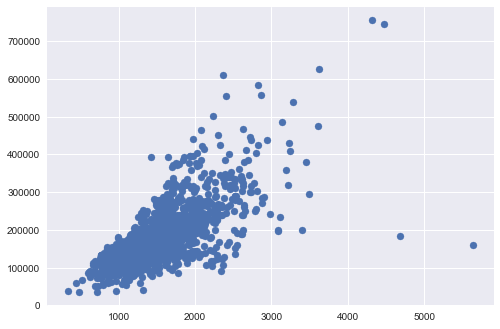

In [9]:
_ = plt.scatter(X["GrLivArea"], y)

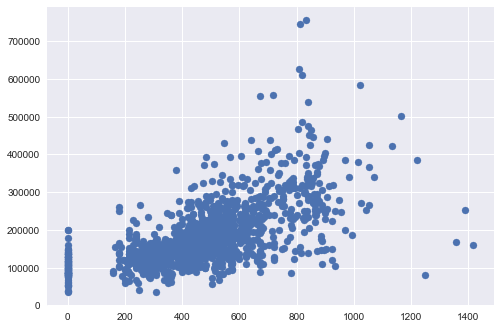

In [10]:
_ = plt.scatter(X["GarageArea"], df["SalePrice"])

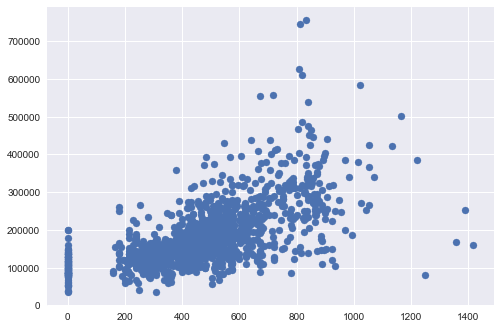

In [11]:
_ = plt.scatter(X["GarageArea"], y)

In [12]:
X = X.values
y = y.values

In [13]:
X = np.concatenate([np.ones(len(y)).reshape(len(y), 1), X], axis = 1)
y = y.reshape((len(y), 1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [15]:
lin = sm.OLS(y_train, X_train)

In [16]:
res = lin.fit()

In [17]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     772.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          9.51e-205
Time:                        15:41:36   Log-Likelihood:                -12505.
No. Observations:                1019   AIC:                         2.502e+04
Df Residuals:                    1016   BIC:                         2.503e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7197.3452   5140.650     -1.400      0.1

In [18]:
mse = np.sum(np.power(y_test.reshape(len(y_test),) - res.predict(X_test), 2)) / len(y_test)

In [19]:
print(mse)

1967813005.2917097


In [20]:
print(mean_squared_error(y_test, res.predict(X_test)))

1967813005.2917097


To make the code reproducible, we make a function to calculate mse from the data

In [21]:
def mse_linreg(X_train, X_test, y_train, y_test):
    lin = sm.OLS(y_train, X_train)
    res = lin.fit()
    return(mean_squared_error(y_test, res.predict(X_test)))

In [22]:
n = 10000
mse_vector = np.zeros(n)
index_vector = np.arange(0, len(y_train))
for i in range(n):
    index_boot = np.random.choice(index_vector, size = len(index_vector))
    X_boot = X_train[index_boot,:]
    y_boot = y_train[index_boot]
    mse_vector[i] = mse_linreg(X_boot, X_test, y_boot, y_test)

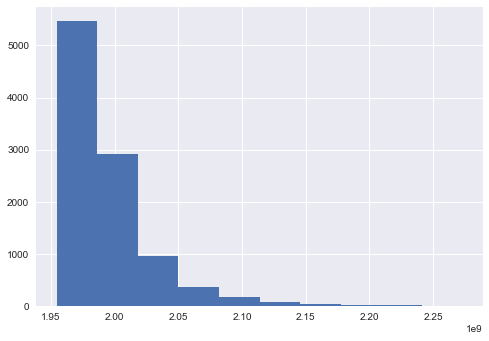

In [23]:
_ = plt.hist(mse_vector)

In [24]:
np.percentile(mse_vector, [2.5, 97.5]) # 95% conf int for test mse

array([1.95819188e+09, 2.08770607e+09])

we can conclude that the worse mse for linear regression of 2 variables is 12

In [25]:
model = LinearRegression()

In [26]:
X = X[:,1:]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [28]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
model.coef_

array([[ 78.96161982, 144.02756016]])

In [30]:
mean_squared_error(y_test, np.exp(model.predict(X_test)))

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').